In [109]:
# IMPORTO EL DATAFRAME
# ------------------------------------------------------------------------------------------------------------------------------------------- 

import sys
import pandas as pd

# agrego el path para main_lib y score_lib
sys.path.append('../_common')

raw_df = pd.read_csv(r"D:\GitHub\mind_wandering_free_speech\Data\Transcripts\all_reports_fMRI_raw.csv") # all_reports_EEG_raw.csv
lemma_df = pd.read_csv(r"D:\GitHub\mind_wandering_free_speech\Data\Transcripts\all_reports_fMRI_lemmas.csv") # all_reports_EEG_lemmas.csv

In [110]:
# PREPROCESO
# ------------------------------------------------------------------------------------------------------------------------------------------- 

import nltk
from nltk.corpus import stopwords  

nltk.download('stopwords') 
stopwords = ['eh', 'emm', 'emmm']

for i, answer in enumerate(lemma_df['filtered_lemmas']):
    word_list = answer.replace("[", "").replace("]", "").replace("'", "").split(", ")
    clean_word_list = []
    for word in word_list:
        # if not word in set(stopwords.words('spanish')):
        if not word in stopwords:
            if "|" in word:
                clean_word_list.append(word.split("|")[0])
            else:
                clean_word_list.append(word)
    clean_answer = " ".join(clean_word_list)    
    lemma_df.loc[i, 'clean_lemmas'] = clean_answer
       
     
lemma_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,subject_id,round,text,lemmas,tags,filtered_lemmas,clean_lemmas
0,0,SO2,1,"ok. Eh, estuve pensando en el fin de semana pa...","['ok', 'eh', 'pensar', 'fin', 'semana', 'pasar...","['ADJ', 'ITJN', 'VLger', 'NC', 'NC', 'VLadj', ...","['ok', 'pensar', 'fin', 'semana', 'ir|ser', 'c...",ok pensar fin semana ir casa amigo acordar lle...
1,1,S14,5,"estaba pensando en, estaba pensando en las act...","['pensar', 'pensar', 'actividad', 'mañana', 't...","['VLger', 'VLger', 'NC', 'NC', 'VLfin', 'VLinf...","['pensar', 'pensar', 'actividad', 'mañana', 't...",pensar pensar actividad mañana tener dar clase...
2,2,S18,3,bueno. Estábamos caminando con mi novio por la...,"['bueno', 'caminar', 'mi|mío', 'novio', 'calle...","['ITJN', 'VLger', 'PPO', 'NC', 'NC', 'NP', 'VL...","['caminar', 'novio', 'calle', 'roma', 'decidir...",caminar novio calle roma decidir ir comer pizz...
3,3,S35,6,emmm...estuve pensando en el fin de semana ant...,"['emmm', '...', 'pensar', 'fin', 'semana', 'an...","['VLfin', 'DOTS', 'VLger', 'NC', 'NC', 'ADJ', ...","['emmm', 'pensar', 'fin', 'semana', 'anterior'...",pensar fin semana anterior venir amigo luego a...
4,4,S13,9,"eh. Al principio no, en nada, no se como bloqu...","['eh', 'principio', 'saber', 'bloquear', 'sabe...","['ITJN', 'NC', 'VLfin', 'VLadj', 'VLfin', 'VLf...","['principio', 'saber', 'saber', 'venir', 'mont...",principio saber saber venir montón cosa desord...


In [111]:
# SENTIMENT ANALYSIS
# ------------------------------------------------------------------------------------------------------------------------------------------- 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()
column = 'text'
for i, answer in enumerate(lemma_df[column]):
    
    if column == 'text':
        # Si es la columna de texto no tengo que hacer ningún tratamiento de los datos
        clean_answer = answer    
    else:
        clean_answer = lemma_df['clean_lemmas']   
        
    # Calculo los scores:
    sentiment_dict = vader_analyzer.polarity_scores(clean_answer)
    lemma_df.loc[i, 'sa_negative'] = sentiment_dict['neg']
    lemma_df.loc[i, 'sa_neutral'] = sentiment_dict['neu']
    lemma_df.loc[i, 'sa_positive'] = sentiment_dict['pos']
    lemma_df.loc[i, 'sa_compound'] = sentiment_dict['compound']
    
    # Calculo las medias: si supera el valor de la media del dataframe asigno 1, si está por debajo asigno 0
    median_negative = lemma_df['sa_negative'].median()
    median_neutral = lemma_df['sa_neutral'].median()
    median_positive = lemma_df['sa_positive'].median()
    median_compound = lemma_df['sa_compound'].median()
    
    lemma_df['med_negative'] = lemma_df['sa_negative'].apply(lambda x: 1 if x >= median_negative else 0)
    lemma_df['med_neutral'] = lemma_df['sa_neutral'].apply(lambda x: 1 if x >= median_neutral else 0)
    lemma_df['med_positive'] = lemma_df['sa_positive'].apply(lambda x: 1 if x >= median_positive else 0)
    lemma_df['med_compound'] = lemma_df['sa_compound'].apply(lambda x: 1 if x >= median_compound else 0)
    
lemma_df.head()

,Unnamed: 0,subject_id,round,text,lemmas,tags,filtered_lemmas,clean_lemmas,sa_negative,sa_neutral,sa_positive,sa_compound,med_negative,med_neutral,med_positive,med_compound
0,0,SO2,1,"ok. Eh, estuve pensando en el fin de semana pa...","['ok', 'eh', 'pensar', 'fin', 'semana', 'pasar...","['ADJ', 'ITJN', 'VLger', 'NC', 'NC', 'VLadj', ...","['ok', 'pensar', 'fin', 'semana', 'ir|ser', 'c...",ok pensar fin semana ir casa amigo acordar lle...,0.021,0.979,0.0,-0.5267,1,1,1,0
1,1,S14,5,"estaba pensando en, estaba pensando en las act...","['pensar', 'pensar', 'actividad', 'mañana', 't...","['VLger', 'VLger', 'NC', 'NC', 'VLfin', 'VLinf...","['pensar', 'pensar', 'actividad', 'mañana', 't...",pensar pensar actividad mañana tener dar clase...,0.040,0.960,0.0,-0.5267,1,0,1,0
2,2,S18,3,bueno. Estábamos caminando con mi novio por la...,"['bueno', 'caminar', 'mi|mío', 'novio', 'calle...","['ITJN', 'VLger', 'PPO', 'NC', 'NC', 'NP', 'VL...","['caminar', 'novio', 'calle', 'roma', 'decidir...",caminar novio calle roma decidir ir comer pizz...,0.000,1.000,0.0,0.0000,0,1,1,1
3,3,S35,6,emmm...estuve pensando en el fin de semana ant...,"['emmm', '...', 'pensar', 'fin', 'semana', 'an...","['VLfin', 'DOTS', 'VLger', 'NC', 'NC', 'ADJ', ...","['emmm', 'pensar', 'fin', 'semana', 'anterior'...",pensar fin semana anterior venir amigo luego a...,0.015,0.985,0.0,-0.2960,0,1,1,1
4,4,S13,9,"eh. Al principio no, en nada, no se como bloqu...","['eh', 'principio', 'saber', 'bloquear', 'sabe...","['ITJN', 'NC', 'VLfin', 'VLadj', 'VLfin', 'VLf...","['principio', 'saber', 'saber', 'venir', 'mont...",principio saber saber venir montón cosa desord...,0.171,0.829,0.0,-0.8807,1,0,1,0


c:\Users\Fede\anaconda3\envs\labo_env\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



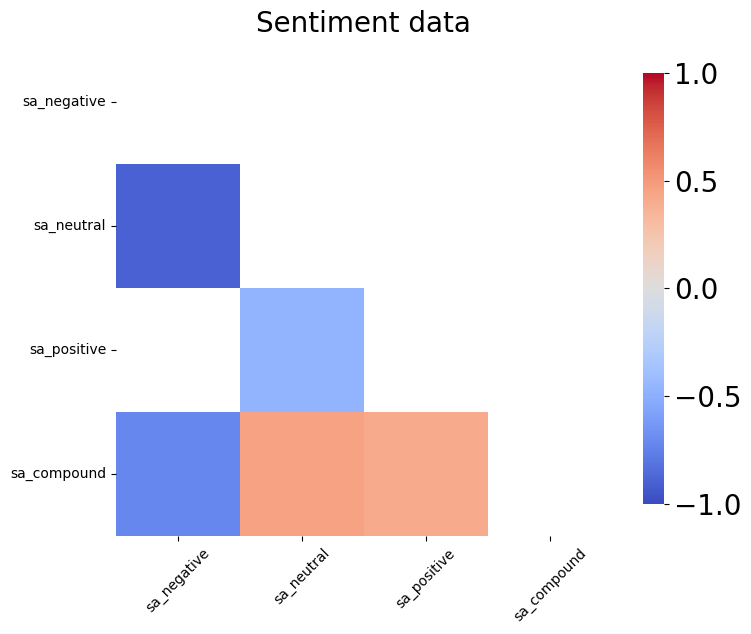

In [120]:
# CORRELATION MATRIX
# ------------------------------------------------------------------------------------------------------------------------------------------- 
def plot_corr_matrix(df, title, x_labels, y_labels, p_value=0.05, r_threshold=0.3, mult_comparison=True, sq_size=30, method='pearson', save_dir="", file_name=""):  
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from scipy import stats
    import numpy as np
    import os.path

    corr_matrix = df.corr(method=method)

    # Calculo las correlaciones y sus p-values
    pval_matrix = pd.DataFrame()
    for x in df.columns:
        for y in df.columns:
            corr = stats.pearsonr(df[x], df[y])
            corr_matrix.loc[x,y] = corr[0]
            pval_matrix.loc[x,y] = corr[1]

    # si corrijo por comparaciones múltiples divido el p-valor por la cantidad de correlaciones que hago
    if mult_comparison:
        p_value = p_value / (len(df.columns)*len(df.columns))

    # Me quedo sólo con los p-values significativos
    # Armo la matriz y su máscara:
    pval_matrix = pval_matrix[pval_matrix <= p_value]
    pval_mask = np.zeros_like(pval_matrix, dtype=bool)
    pval_mask[pval_matrix <= 0.05] = True

    # Armo otra máscara para no mostrar el triangulo superior
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask = mask + pval_mask
    mask[np.triu_indices_from(mask, 0)] = False #True para eliminar la máscara
    mask = ~mask

    # Mmuestro solo las correlaciones que superen cierto umbral
    corr_matrix_htmp = corr_matrix[abs(corr_matrix) >= r_threshold]

    # Armo el heatmap
    fig, ax = plt.subplots(figsize=(sq_size, sq_size))
    
    # axis settings, font sizes, etc:    
    ax.set_title(title, fontsize = 20)   
    
    # grid settings
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3) 
        
    ax = sns.heatmap(corr_matrix_htmp,                
                    mask = mask,                
                    ax = ax,
                    xticklabels = x_labels, 
                    yticklabels = y_labels,                
                    square = True,                
                    annot = True,
                    #linewidths = .1,
                    #linecolor="grey",
                    cmap = "coolwarm",
                    cbar_kws = {"shrink": .7,
                                "ticks": [-1, -.5, 0, 0.5, 1]},
                    vmin = -1,
                    vmax = 1,                                
                    annot_kws = {"size": 12})  

    # colorbar settings    
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    # axis post settings
    plt.yticks(rotation=0)
    plt.xticks(rotation=45) 
    
    plt.show()
    
    if os.path.isdir(save_dir):        
        if file_name == '':
            file_name = title
        fig_dir = (r'{}\{}.png').format(save_dir, file_name)    
        figure = ax.get_figure()  
        figure.savefig(fig_dir, format='png', dpi=400, transparent=False)        
    plt.close()

    
sentiment_df = lemma_df[['sa_negative', 'sa_neutral', 'sa_positive', 'sa_compound']]
plot_corr_matrix(sentiment_df, 'Sentiment data', sentiment_df.columns, sentiment_df.columns, p_value=0.05, r_threshold=0.3, mult_comparison=True, sq_size=8, method='spearman', save_dir="", file_name="")

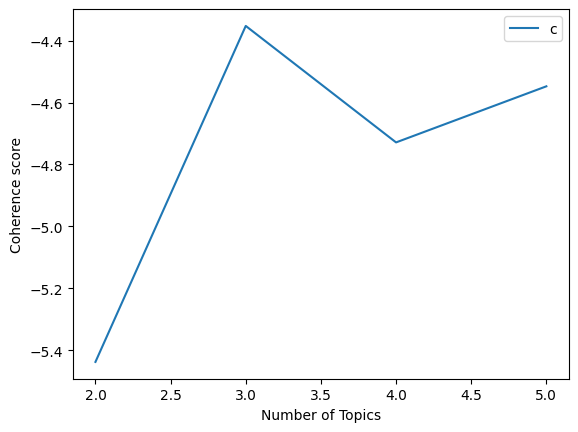

Topic #0: 0.637*"pensar" + 0.347*"tener" + 0.317*"hacer" + 0.238*"ir" + 0.187*"después" + 0.178*"acordar"
Topic #1: 0.639*"pensar" + -0.297*"acordar" + -0.281*"ver" + -0.247*"ahí" + -0.226*"ir" + -0.190*"después"
Topic #2: -0.557*"hacer" + -0.438*"tener" + 0.262*"acordar" + 0.218*"pensar" + 0.195*"decir" + 0.166*"lugar"


In [91]:
# LSA GENSIM
# ------------------------------------------------------------------------------------------------------------------------------------------- 

import nltk
from gensim import models, corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from nltk import word_tokenize
import matplotlib.pyplot as plt

# nltk.download('punkt')

NUM_TOPICS = 6
NUM_WORDS = 6
corpus_docs = lemma_df['clean_lemmas'] 

# Tokenizo los documentos importados en el paso 1 
tokenized_corpus = []
for text in corpus_docs:
    tokenized_corpus.append(word_tokenize(text))
  
# Armo un diccionario asociando cada palabra a un word id
lsa_dictionary = corpora.Dictionary(tokenized_corpus)
 
# Asocio el word id a cada palabra para cada documento
lsa_doc_terms = [lsa_dictionary.doc2bow(text) for text in tokenized_corpus]

# ----------------------------------------
# Computo Coherence y determino la cantidad de topics adecuada
stop = NUM_TOPICS 
start = 2
step = 1

coherence_values = []
model_list = []
for num_topic in range(start, stop, step):
    # generate LSA model
    # print(str(num_topics), " of ", str(NUM_TOPICS))
    lsa_model_gsm = LsiModel(lsa_doc_terms, num_topics = num_topic, id2word = lsa_dictionary, random_seed = 0)
    model_list.append(lsa_model_gsm)
    coherencemodel = CoherenceModel(model = lsa_model_gsm, texts = tokenized_corpus, dictionary = lsa_dictionary, coherence='u_mass') # u_mass / c_v
    coherence_values.append(coherencemodel.get_coherence())
    
# ----------------------------------------
# Ploteo los topics
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# ----------------------------------------
# Muestro los topics para la cantidad de modelos óptima:
TOPIC_COUNT = 3
lsa_model_gsm = LsiModel(lsa_doc_terms, num_topics = TOPIC_COUNT, id2word = lsa_dictionary)

for idx in range(TOPIC_COUNT):
    # muestro las palabras que mas contribuyen a cada topic    
    print("Topic #%s:" % idx, lsa_model_gsm.print_topic(idx, NUM_WORDS))          

In [92]:
# LDA SKLEARN
# ------------------------------------------------------------------------------------------------------------------------------------------- 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

NUM_TOPICS = 3
NUM_WORDS = 10
corpus_docs = lemma_df['clean_lemmas'] 
    
count_vectorizer = CountVectorizer(max_df = 0.8, 
                                   min_df = 0.2, 
                                   max_features = 1000)
# armo la sparse matrix 
BoW = count_vectorizer.fit_transform(corpus_docs)
# evalúo con qué palabras se quedó
features = count_vectorizer.get_feature_names_out() 
lda_model_skl = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter = 200, learning_method = 'online', learning_offset = 50, random_state = 42).fit(BoW)

# Muestro los topics para el corpus dado:
for idx, topic in enumerate(lda_model_skl.components_):
    print("Topic %d:" % (idx))
    print(" ".join([features[i]
                    for i in topic.argsort()[:-NUM_WORDS - 1:-1]]))
    

Topic 0:
ver después ir ahí bueno empezar acordar hacer tener cosa
Topic 1:
hacer acordar tener así saber ahí después bueno empezar cosa
Topic 2:
pensar tener ir hacer cosa empezar después bueno saber acordar
